In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def feture_scaling(df, scaling_strategy="min-max", column=None):
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /(df[column_name].max() - df[column_name].min())  #minmax scaler 로 변환
        elif scaling_strategy == "z-score":
            df[column_name] = (df[column_name]-df[column_name].mean() ) /(df[column_name].std() )
    return df


data = pd.read_csv('/content/drive/Shared drives/BigData/origin_data/mecab_all_morph.csv',encoding='utf-8')
label = pd.read_csv('/content/drive/Shared drives/BigData/origin_data/alldata.csv',encoding='utf-8')['smishing']


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719

In [ ]:
data  =pd.concat([data,label],axis = 1)

words = {}
smi_count = 0
normal_count = 0
words_smi = {}
for d in data[data['smishing'] == 0].values.tolist():
  for x in d[1:] :
    if pd.notnull(x) :
      if x in words.keys() : 
        words[x] +=1
      else :
        words[x] = 1 
  normal_count +=1
for d in data[data['smishing'] == 1].values.tolist():
  for x in d[1:] :
    if pd.notnull(x) :
      if x in words_smi.keys() : 
        words_smi[x] +=1
      else :
        words_smi[x] = 1 
  smi_count += 1

print(normal_count)
print(smi_count)

277242
18703


In [ ]:

dictlist = {}
for key, value in words.items():
  if (str(type(key))== "<class 'float'>") : 
    continue
  data = key[2:-1].split()
  if data[-1] in dictlist.keys() :
    dictlist[data[-1]] += value
  else  :
    dictlist[data[-1]] = value
  
dictlist_smi = {}
for key, value in words_smi.items():
  if (str(type(key))== "<class 'float'>") : 
    continue
  data = key[2:-1].split()
  if data[-1] in dictlist_smi.keys() :
    dictlist_smi[data[-1]] += value
  else  :
    dictlist_smi[data[-1]] = value
normal_dict = []
smi_dict = []
for key,value in dictlist.items() :
  temp = [key,value]
  normal_dict.append(temp)

for key,value in dictlist_smi.items() :
  temp = [key,value]
  smi_dict.append(temp)

 
dic = pd.DataFrame(normal_dict,columns=['h','count'])
dic_smi = pd.DataFrame(smi_dict,columns=['h','count'])


                        h   count
40                   'EC'  678602
215               'EC+EP'       1
145              'EC+JKO'      12
311              'EC+JKS'       2
105               'EC+JX'     236
..                    ...     ...
369         'XSV+ETN+JKB'       3
300         'XSV+ETN+JKO'       6
247          'XSV+ETN+JX'      14
354  'XSV+ETN+VCP+EC+VCP'       2
308             'XSV+JKO'       1

[388 rows x 2 columns]


           normal_count   smi_count
'NNG'         19.403251  142.691440
'SL'           4.607242   10.105812
'VV'           2.550169   12.349890
'EC'           2.447688   17.725445
'SF'           2.280488   16.187563
'MAG'          2.004033    7.368604
'JKB'          1.789534   12.982837
'SN'           1.764935   22.425493
'SY'           1.603487   14.068171
'JX'           1.507683    7.747527
'XSN'          1.217031    7.164893
'VV+EC'        1.210953    5.731647
'EP'           1.196684    6.554938
'XSV'          1.185196    5.048441
'JKO'          1.137450   10.150885
'ETM'          1.076828    5.930653
'JKS'          1.006777    7.941186
'VX'           0.883834    5.739400
'NNBC'         0.857990    7.357162
'XSA+ETM'      0.845262    0.911512
'NNP'          0.815273    2.256376
'EP+EF'        0.806573    1.134417
'VA'           0.768949    5.461584
'EF'           0.695631    3.614447
'NNB'          0.646688    8.209164
'JKG'          0.621850    3.465006
'SSO'          0.549542    4

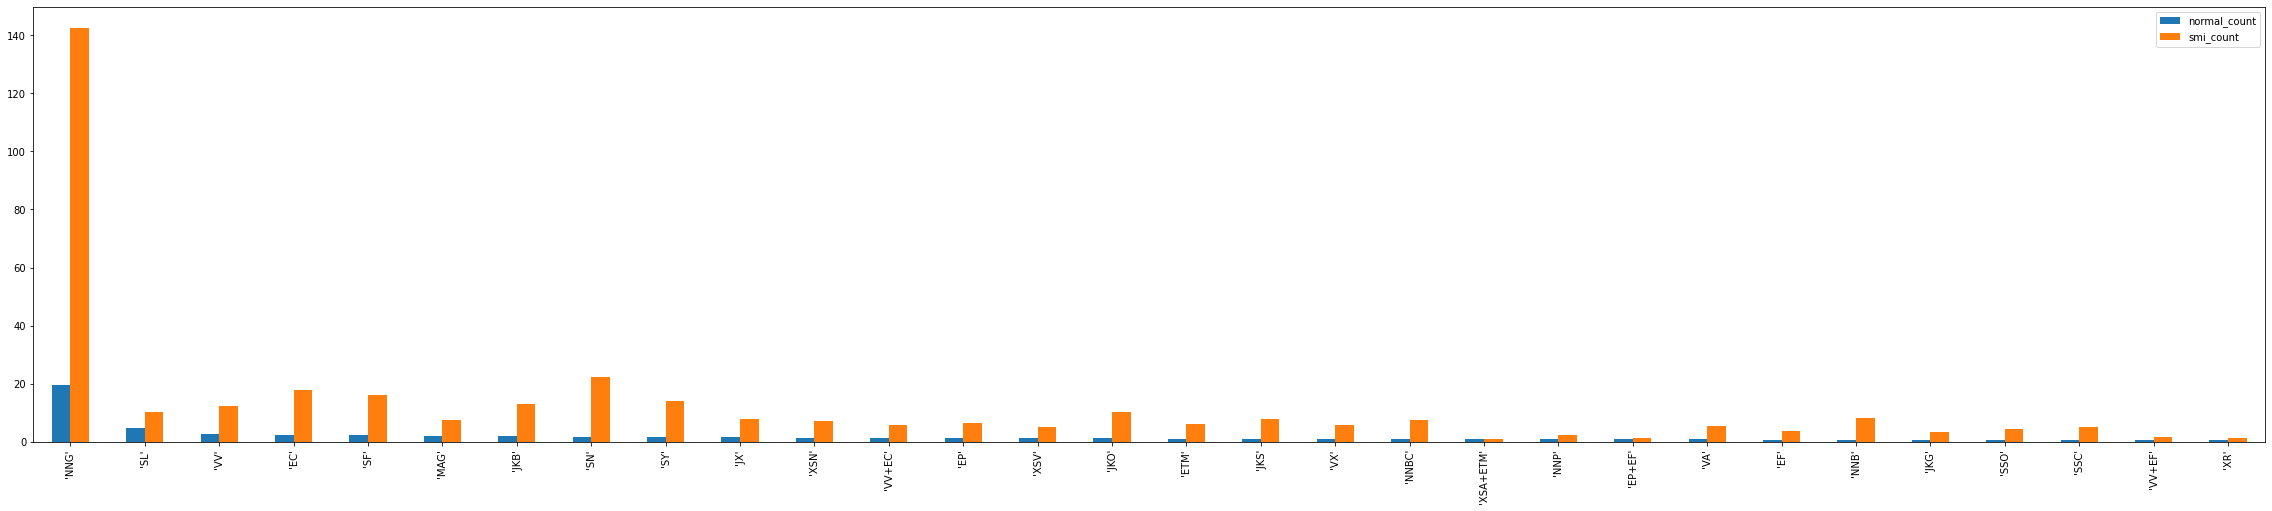

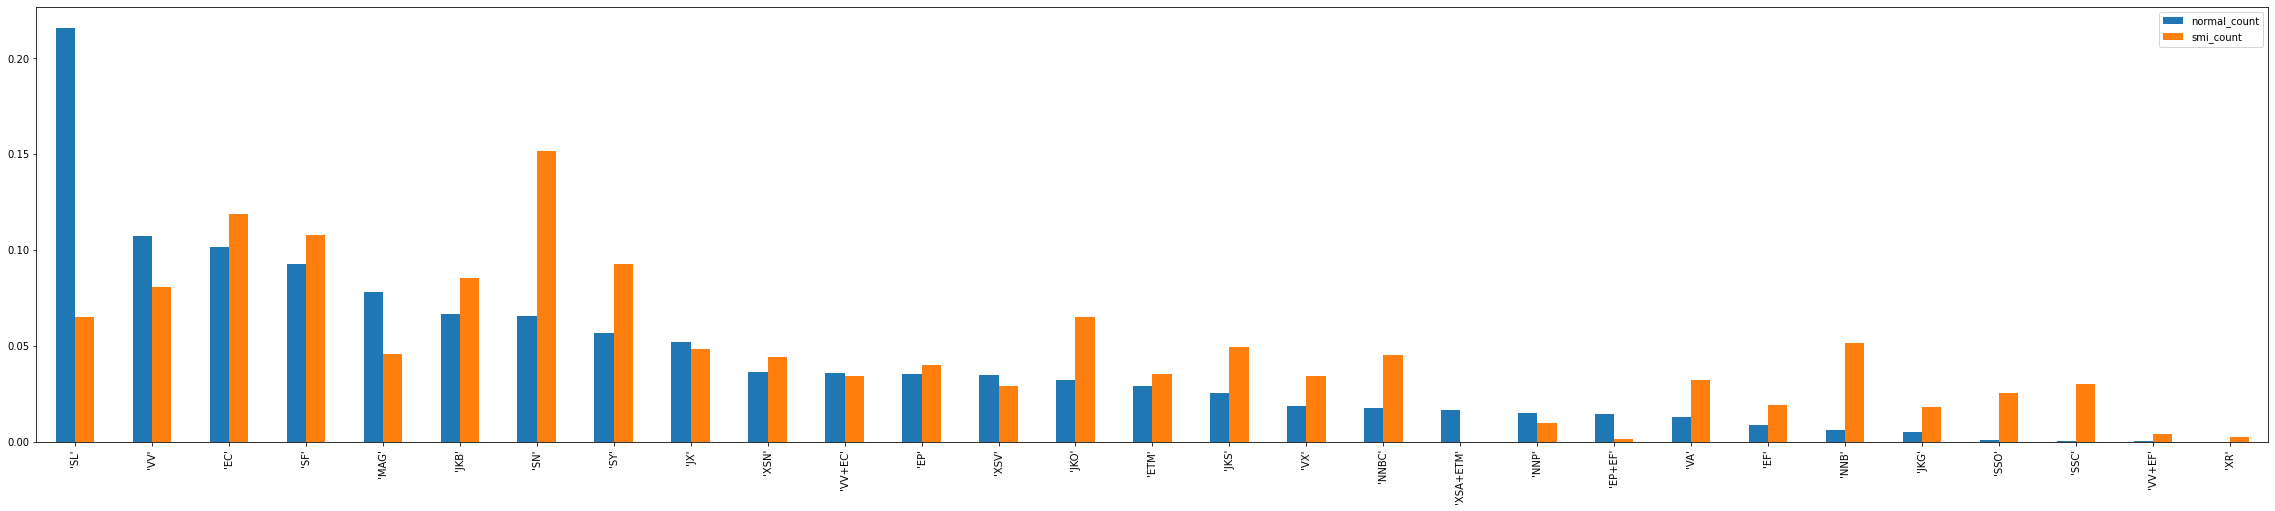

In [ ]:
sort_dic = dic.set_index('h').sort_values('count',ascending = False)
sort_smi_dic =dic_smi.set_index('h').sort_values('count',ascending = False)


all = pd.concat([sort_dic,sort_smi_dic],axis = 1)

all.columns = ['normal_count','smi_count']
all['normal_count'] /= normal_count
all['smi_count']/= smi_count 
print(all[:30])
all = all[:30]

all.plot(kind= 'bar',figsize = (40,8))
all = feture_scaling(all,scaling_strategy= 'min-max',column=['normal_count','smi_count'])
all_t = all.drop("'NNG'")
all_t.plot(kind= 'bar',figsize = (40,8))

pd.set_option('display.max_columns', 500)


In [ ]:
print(smi_count)
print(count)

2039
50000
